In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [10]:
input = '../data/data_intermediaire_train.parquet'

In [11]:
df = pd.read_parquet(input)
df.iloc[0]['text']

'When this movie first came out back in 1984, Prince was one of the hottest acts around. Everyone wanted to see this movie, which was not much more than a extended music video. The acting was pretty bad, but what can you expect from musicians acting on the big screen for the first time? Despite that, it was still a very entertaining film! Morris Day and Jerome Benton provide some all time classic comedy, especially their rendition of "The Password", which will make you think of Abbott & Costello doing their "who\'s on first" baseball routine.<br /><br />Appolina (who went by a single name then) provided some beautiful breasts, so you had the brief nudity covered. Plus, she is very attractive. And of course, the soundtrack of the album is one of the best Prince ever recorded. Prince later on had a fallout with Warner Bros. and changed his name, but at this particular time in his career, he was at the top of his game.<br /><br />This movie doesn\'t rank in the all time great category, bu

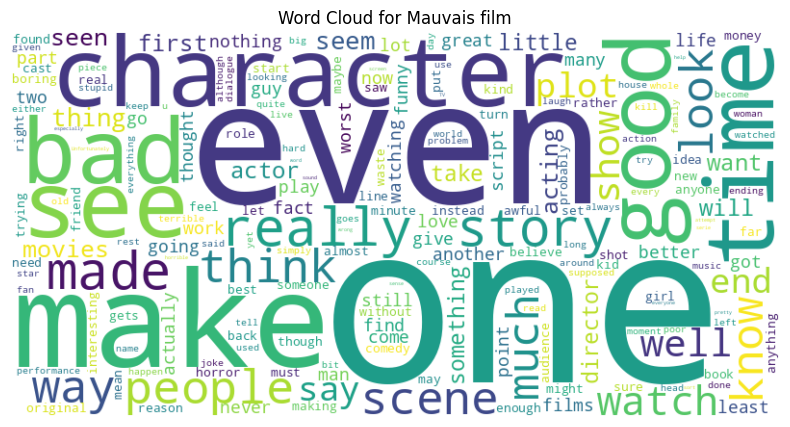

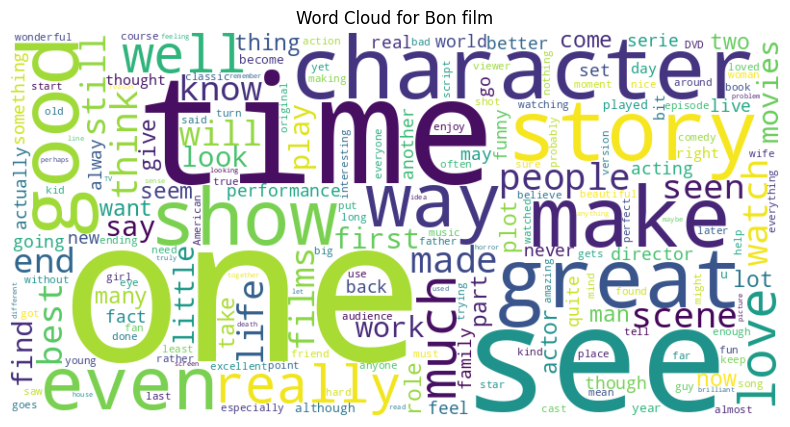

In [12]:
additional_stopwords = set(["movie","film","br"])
stopwords = STOPWORDS.union(additional_stopwords)

for label, category in [(0, "Mauvais film"), (1, "Bon film")]:
    category_data = df[df['label'] == label]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(category_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

In [13]:
nltk.download('punkt')

DetectorFactory.seed = 0  
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['text'].apply(detect_language)

language_counts = df['language'].value_counts()
print("Distribution des langues détectées :")
print(language_counts)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Distribution des langues détectées :
language
en    24999
nl        1
Name: count, dtype: int64


In [14]:
df[df['language']=='nl'].iloc[0]['text']

"You'd better choose Paul Verhoeven's even if you have watched it."


Statistiques sur le nombre de mots :
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: word_count, dtype: float64


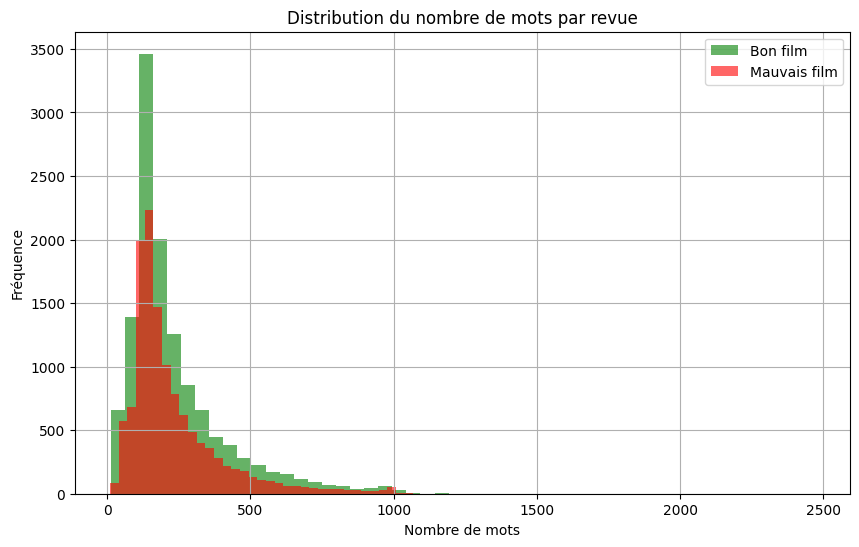

In [15]:
def count_words(text):
    if isinstance(text, str):  
        words = text.split()  
        return len(words)
    return 0

df['word_count'] = df['text'].apply(count_words)

# Affichage des statistiques globales
word_count_distribution = df['word_count'].describe()
print("\nStatistiques sur le nombre de mots :")
print(word_count_distribution)

# Séparer les données selon la catégorie
word_count_good = df[df['label'] == 1]['word_count']
word_count_bad = df[df['label'] == 0]['word_count']

# Affichage de l'histogramme superposé
plt.figure(figsize=(10, 6))
plt.hist(word_count_good, bins=50, alpha=0.6, color='green', label="Bon film")
plt.hist(word_count_bad, bins=50, alpha=0.6, color='red', label="Mauvais film")
plt.title('Distribution du nombre de mots par revue')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()